# Applied Data Science Lab 2: Sentiment Analysis of Reviews

## Task - 1

### **Importing Libraries**

In [1]:
# Importing Libraries
import numpy as nm 
import pandas as pd 
import seaborn as sns
import re 
from IPython.display import display 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


### Reading the file

In [2]:
file =  pd.read_csv('car_reviews.csv')

In [3]:
#downloading Punkt Tokenizer Models to allow word_tokenize to work
nltk.download('punkt')
#downloading stopwords which contains a list of stopwords that can be ignored
nltk.download('stopwords')

#assigning the PorterStemmer function
ps = PorterStemmer()

[nltk_data] Downloading package punkt to C:\Users\The
[nltk_data]     Best\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\The
[nltk_data]     Best\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cleaning Function

1. Converts all the text to the lowercase
2. Exclusion of Words and Punctuation/Ignoring Case Sensitivity


In [4]:
def cleaning(reviews):
    
    #converting text to lowercase
    reviews = reviews.lower()
     
    #removing characters that aren't in the alphabet
    reviews = re.sub('[^a-z0-9]', ' ', reviews)
      
    #splitting text into tokens
    tokenize = word_tokenize(reviews)
    
    #adding STEM of the tokens that aren't in "stopwords" to a list
    stem_list = [ps.stem(word) for word in tokenize if word not in set(stopwords.words('english'))]
     
    #turning list into a string
    joined_text = ' '.join(stem_list)
    
    return joined_text

### Cleaning Process

In [5]:
#list to store the processed reviews
data = []

#going through each review in the dataframe
for i in range(file.shape[0]):
    #selecting review in pandas DataFrame
    reviews = file.iloc[i, 1]
    
    #clean review using cleaning function
    cleaned_reviews = cleaning(reviews)
    
    #adding cleaned review to a list
    data.append(cleaned_reviews)
    

### Example on how cleaning process works
The cell below is an example of how the data is initially cleaned. First, the whole texts are converted to lower case. Then  take only the characters that are in the alphabets and numbers using `re.sub` method. So puctuations will get removed. After tokenizing, remove the words that don't have sentiment and append the other words in the list that are not in stopwords. Finally, the list is then joined together into one big piece of text.

In the below example, 
* First, converted all the words to lowercase. (Taurus -> taurus)
* Removed the punctuations and words that don't have sentiment (*'in', 'the', ...*)
* Joined the list of words as a single text.

In [6]:
#Printing the first review/row of data.
first_row = file['Review'][1]

lower_text = first_row.lower()

#removing characters that aren't in the alphabet
punct_text = re.sub('[^a-z0-9]', ' ', lower_text)
# punct_text = re.sub('[^a-z]', ' ', punct_text)
#splitting text into tokens
tokenize = word_tokenize(punct_text)

#iterating through the tokens and add the token to a list if it doesn't appear in "stopwords"
word_list = [word for word in tokenize if word not in set(stopwords.words('english'))]
#turning list into a string
final_text = " ".join(word_list)

#showing comparison of raw data against cleaned data
print('\033[1m' +"The original text is:"+'\033[0m')
print('')
print(first_row)
print('')
print('\033[1m' +"Converting text to lowercase"+'\033[0m')
print('')
print(lower_text)
print('')
print('\033[1m' +'The cleaned text is:'+'\033[0m' )
print('')
print(final_text)
print('')

The original text is:

 The last business trip  I drove to San Francisco  I went to Hertz Rentals and got a 1999 Ford Taurus  thinking it looked comfortable and professional  I found the seating to be uncomfortable for myself  as well as for my passenger Now  seating comfort may not be important to you  but it is to me The fuel usage was fine  the car did get us there with no problems  but  it was such an uncomfortable ride for both of us  It is not as though I am hard to fit into a car  I am 5 5  weigh 115 pounds  and I am usually quite comfortable in most any car  But  the Taurus seemed especially uncomfortable  For anyone who is thinking of renting a car for a long trip  I would suggest that the Ford Taurus  1999  not be on the list of  be sure to get this There was a large trunk that allowed us to pack a lot of materials needed for the business end of the trip  Driving it was a breeze  and everything  worked  right  I have no complaints about the standard making of the car  except 

### Example for stemming process
The cell below demonstrates the stemming process. There are 3 different lists with different words of same stem. I have used`portstemmer` function, it finds the stem of a given word. The stemmed words are then appended to a single list.

In [7]:
#creating 3 examples of words that have the same stem
test_list1 = ['play', 'plays', 'played', 'playing']
test_list2 = ['drinks', 'drink', 'drinking']
test_list3 = ["codes", 'coding', 'code']


#going through all 3 of the lists and adding the stem of each word to a list
list1 = []
for i in test_list1:
    list1.append(ps.stem(i))
    
list2 = []
for j in test_list2:
    list2.append(ps.stem(j))

list3 = []
for k in test_list3:
    list3.append(ps.stem(k))
    
    

#comparing original word list to stems list
print(str(test_list1) + ' ----> ' + str(list1))
print('')
print(str(test_list2) + ' -----------> ' + str(list2))
print('')
print(str(test_list3) + ' ---------------> ' + str(list3))
print('')

['play', 'plays', 'played', 'playing'] ----> ['play', 'play', 'play', 'play']

['drinks', 'drink', 'drinking'] -----------> ['drink', 'drink', 'drink']

['codes', 'coding', 'code'] ---------------> ['code', 'code', 'code']



### Vector Creation
The cell below demonstrates the vector creation. It creates a vector for the first 5 reviews. First, we do the **'cleaning'** process. Then a vector of tokens for each word is generated. Then the vectors are put into a DataFrame and displayed using the display method. The words found, alongside the number of time they occur in the reveiew can also be seen.

In [8]:
#going through first 5 reviews in the dataset
for i in range(5):
    reviews = file['Review'][i]
    
    #clean review
    cleaned_reviews = cleaning(reviews)
    
    #converting text into a vector of token counts
    vect = CountVectorizer()
    
    vector = vect.fit_transform([cleaned_reviews])
    #putting vector into a dataframe
    
    vectorised = pd.DataFrame(vector.A, columns = vect.get_feature_names())
    
    #displaying vectors for each review
    print('')
    print('The count vector for review ' + str(i+1) + ' is:')
    display(vectorised)
    
print('')


The count vector for review 1 is:


,1992,1999,anyway,back,batteri,bought,buy,car,card,care,...,take,tank,tauru,thee,think,tire,tri,version,way,would
0,3,1,1,1,1,2,1,1,1,1,...,1,1,3,1,1,1,1,1,1,2



The count vector for review 2 is:


,115,1999,allow,anoth,anyon,area,basi,better,breez,busi,...,uncomfort,unnecessarili,us,usag,usual,weigh,well,went,work,would
0,1,2,1,1,1,1,1,1,1,2,...,4,1,3,1,1,1,1,1,1,2



The count vector for review 3 is:


,000,10mpg,1700,1990,200,70,98,addit,air,also,...,valv,vehicl,vibrat,week,went,within,work,wrong,yard,year
0,2,1,1,1,1,1,1,1,3,1,...,1,4,1,5,2,3,1,1,1,1



The count vector for review 4 is:


,000,10,15,17,2000,2003,30k,36k,400,4l,...,upset,use,valu,vehicl,version,warranti,weight,welcom,xlt,yet
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,5,1,8,1,1,1,1



The count vector for review 5 is:


,200sx,abl,acceler,ad,addit,almost,alot,alway,anyon,avoid,...,trade,transport,van,vehicl,way,well,windstar,worri,would,yet
0,1,1,1,1,1,1,2,1,1,1,...,1,1,4,4,3,2,4,1,1,1


# Confusion Matrix Function

In [9]:
def display_matrix(matrix):
    '''Function for showing the confusion matrix of a classifier'''
    
    #list of results of the classifer
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    
    #finding number of each result
    counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
    
    #finding percentage weighting of each result
    percentages = ["{0:.2%}".format(value) for value in (matrix.flatten() / nm.sum(matrix))]
    
    #creating a list of all values above
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (names, counts, percentages)]
    
    labels = nm.asarray(labels).reshape(2,2)
    
    #creating a heatmap and adding annotations to it 
    visualisation = sns.heatmap(matrix, annot = labels, fmt = '', cmap = 'Blues')
    
    return visualisation

### Training/Test split
We take 80% data for training and 20% data for testing purpose. This is done via the train_test_split method in scikit-learn library.

In [10]:
#converting all reviews into a vector of token counts using unigrams
vector = CountVectorizer(ngram_range=(1,1))


X = vector.fit_transform(data).toarray()
Y = file.iloc[:, 0]             # need to kow what iloc does ?

#creating training and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1050)

#displaying number of reviews being trained and tested on
print('The number of reviews in the training split is: ' + str(len(X_train)) + '.')
print('The number of reviews in the test split is: ' + str(len(X_test)) + '.')


The number of reviews in the training split is: 1105.
The number of reviews in the test split is: 277.


### Naives Bayes classifier

In [11]:
#using Multinomial Naive Bayes classifier on training data from scikit-learn
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

print('The classifier has been fitted using X_train and Y_train.')
print('')

print('The length of X_train is: ' + str(len(X_train)) + '.')
print('The length of Y_train is: ' + str(len(Y_train)) + '.')
print('')

#predict sentiment for test data
Y_pred = classifier.predict(X_test)

#get confusion matrix and accuracy for prediction
cf_matrix = confusion_matrix(Y_test, Y_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)

#showing the result of the classifier being used on the training data.
training_accuracy = classifier.score(X_train, Y_train)
print('Accuracy for the Multinomial Naive Bayes classifier on the training data is: %.2f%% ' % (training_accuracy * 100.0))
print('')

#display accuracy of the classifer
print('Accuracy for the Multinomial Naive Bayes classifier on the test data is: %.2f%% ' % (test_accuracy * 100.0))
print('')

The classifier has been fitted using X_train and Y_train.

The length of X_train is: 1105.
The length of Y_train is: 1105.

Accuracy for the Multinomial Naive Bayes classifier on the training data is: 91.58% 

Accuracy for the Multinomial Naive Bayes classifier on the test data is: 81.59% 



The confusion matrix for the Multinomial Naive Bayes classifier is:


<AxesSubplot:>

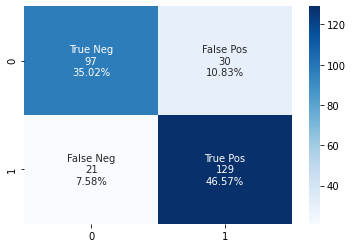

In [12]:
#display confusion matrix
print('The confusion matrix for the Multinomial Naive Bayes classifier is:')
display_matrix(cf_matrix)

## Task-2

### Improving The Solution To Task 1:
In Task 1, the solution only used unigrams in the text classification. This method involved only looking at each word individually instead of multiple words at once. For task 2, instead of using unigrams, I will be using bigrams as well as different naives bayes classifier. Unigrams has one major issue in sentiment analysis. 
For example, in the case **'I am not happy'**, a classifier trained on unigrams would state that this sentence would have a positive sentiment due to the word **'happy'** being so strong in sentiment. It ignores the **'not'** as it is only looking at the words on an individual basis. However, on a classifier that was trained using bigrams would state that this sentence has a negative sentiment. This is due to it also looking at the words in the sentence in pairs as well as individually. It would see **'not happy'** and understand that this is a negative response because of the negation word (**'not'**) appearing before a positive word (**'happy'**). 

#### References:
[1] Manish Sharma: An Introduction to Naive Bayes Algorithm (2020) 

https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91

[2] Hardikkumar Dhaduk: Using bigrams, trigrams and using different naives bayes classifier algorithms to improve accuracy. (2021)
https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/


### Bigram with Multinomial Naive Bayes classifier

In [17]:
#in order to implement bigrams, the only change needed is to define the ngram_range parameter in CountVectorizer
#when it hasn't been specified, the default value is ngram_range = (1,1) which states to only look at each word individually
#to use bigrams as well as unigrams, all that needs to be changed from the original code is to state explicitly that pairs of words need to be looked at as well as individual words
#ngram_range = (1,2) states that unigrams (1-gram) as well as bigrams (2-gram) should be used the rest of the code is then the same as task 1 
vector2 = CountVectorizer(ngram_range=(1,2))

X2 = vector2.fit_transform(data).toarray()
Y2 = file.iloc[:, 0]


#create another set of training and test data
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 1050)




In [18]:
#using Multinomial Naive Bayes classifier on training data
classifier2 = MultinomialNB()
classifier2.fit(X2_train, Y2_train)

#predict new sentiment for test data
Y2_pred = classifier2.predict(X2_test)

#get new confusion matrix and accuracy for prediction
cf_matrix2 = confusion_matrix(Y2_test, Y2_pred)
test_accuracy2 = accuracy_score(Y2_test, Y2_pred)

#showing the result of the classifier being used on the training data.
training_accuracy2 = classifier2.score(X2_train, Y2_train)
print('Accuracy for the Multinomial Naive Bayes classifier on the training data is: %.2f%% ' % (training_accuracy2 * 100.0))
print('')

print('Accuracy for the Multinomial Naive Bayes classifier on the test data is: %.2f%% ' % (test_accuracy2 * 100.0))
print('')

Accuracy for the Complement Naive Bayes classifier on the training data is: 100.00% 

Accuracy for the Complement Naive Bayes classifier on the test data is: 84.12% 



The confusion matrix for the Multinomial Naive Bayes classifier is:



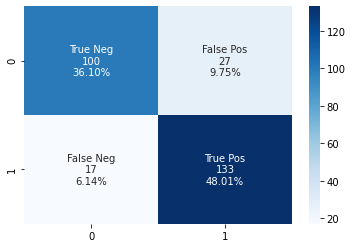

In [21]:
#display confusion matrix
print('The confusion matrix for the Multinomial Naive Bayes classifier is:')
display_matrix(cf_matrix2)
print('')

### Bigram with Complement Naive Bayes classifier

In [ ]:
#in order to implement bigrams, the only change needed is to define the ngram_range parameter in CountVectorizer
#when it hasn't been specified, the default value is ngram_range = (1,1) which states to only look at each word individually
#to use bigrams as well as unigrams, all that needs to be changed from the original code is to state explicitly that pairs of words need to be looked at as well as individual words
#ngram_range = (1,2) states that unigrams (1-gram) as well as bigrams (2-gram) should be used the rest of the code is then the same as task 1 
vector2 = CountVectorizer(ngram_range=(1,2))

X2 = vector2.fit_transform(data).toarray()
Y2 = file.iloc[:, 0]


#create another set of training and test data
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 1050)




In [19]:
#using Complement Naive Bayes classifier on training data
classifier2 = MultinomialNB()
classifier2.fit(X2_train, Y2_train)

#predict new sentiment for test data
Y2_pred = classifier2.predict(X2_test)

#get new confusion matrix and accuracy for prediction
cf_matrix2 = confusion_matrix(Y2_test, Y2_pred)
test_accuracy2 = accuracy_score(Y2_test, Y2_pred)

#showing the result of the classifier being used on the training data.
training_accuracy2 = classifier2.score(X2_train, Y2_train)
print('Accuracy for the Complement Naive Bayes classifier on the training data is: %.2f%% ' % (training_accuracy2 * 100.0))
print('')

print('Accuracy for the Complement Naive Bayes classifier on the test data is: %.2f%% ' % (test_accuracy2 * 100.0))
print('')

Accuracy for the Complement Naive Bayes classifier on the training data is: 100.00% 

Accuracy for the Complement Naive Bayes classifier on the test data is: 84.12% 



The confusion matrix for the Complement Naive Bayes classifier is:



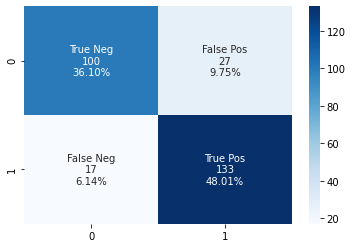

In [22]:
#display confusion matrix
print('The confusion matrix for the Complement Naive Bayes classifier is:')
display_matrix(cf_matrix2)
print('')

### Comparison between task 2 & task 1
The solution we got in task 2 has some improvement when compared with task 1. We can see that there is an increase in the accuracy of the classifier going up by roughly 3.0%.

When comparing the confusion matrices, we can see the expected improvements. The number of True positives is increased by 4. The reaason for this difference was, In the task 1 we have used unigrams where it considers every single word but in task 2 we used bigrams and complement naives bayes classifier. This looks at the words in the sentence in pairs as well as individually So, the positive word have a negative word in front changes the meaning.
